# Trevor Maxwell
## Marketing Campaign Offer Acceptance Prediction
### 2024-04-25

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# import dataset

marketing_df = pd.read_csv('marketing_campaign.csv', sep=';')

# preview dataset
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# view datatypes

marketing_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [4]:
# check for null values

marketing_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# drop nan values

marketing_df_010 = marketing_df.dropna()

In [6]:
# check for duplicate rows

marketing_df_010[marketing_df_010.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


# Preprocessing

In [7]:
# lowercase and replace space with underscore in header

marketing_df_010.columns = [x.replace(" ", "_").lower() for x in marketing_df_010.columns]

marketing_df_010.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response'],
      dtype='object')

In [8]:
# define function to determine final_response target variable

def response_function(row):
    if row['acceptedcmp1'] == 1:
        return 1
    elif row['acceptedcmp2'] == 1:
        return 1
    elif row['acceptedcmp3'] == 1:
        return 1
    elif row['acceptedcmp4'] == 1:
        return 1
    elif row['acceptedcmp5'] == 1:
        return 1
    elif row['response'] == 1:
        return 1
    else:
        return 0

In [9]:
# create final_reponse target variable

marketing_df_010['final_response'] = marketing_df_010.apply(response_function, axis=1)

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\178420042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df_010['final_response'] = marketing_df_010.apply(response_function, axis=1)


In [10]:
# validate new target variable

marketing_df_010.head(20)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,final_response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,0,0,0,0,0,3,11,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,1


In [11]:
# examine z_revenue and z_costcontact features

print(marketing_df_010['z_revenue'].value_counts())
print(marketing_df_010['z_costcontact'].value_counts())

11    2216
Name: z_revenue, dtype: int64
3    2216
Name: z_costcontact, dtype: int64


In [12]:
# drop old reponse columns, z_revenue, z_costcontact and ID column

dropped_columns = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4',
                   'acceptedcmp5', 'response', 'id', 'z_revenue', 'z_costcontact']

marketing_df_100 = marketing_df_010.drop(columns=dropped_columns, axis=1)

# validate columns dropped

marketing_df_100.head()

,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,...,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,final_response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,0,0


In [13]:
# change dt_customer to datetime format

marketing_df_100['dt_customer_frmt'] = pd.to_datetime(marketing_df_100['dt_customer'])
marketing_df_110 = marketing_df_100.drop(columns=['dt_customer'], axis=1).rename(columns={"dt_customer_frmt":
                                                                               "dt_customer"})

In [14]:
# confirm datatype change

marketing_df_110['dt_customer'].dtype

dtype('<M8[ns]')

# Exploratory Data Analysis

In [15]:
# create table for amount of purchases per month

purchases = pd.to_datetime(marketing_df_110.dt_customer).dt.strftime('%Y-%m')
purchase_counts = purchases.value_counts().reset_index().rename(columns={"index": "dt_customer",
                                                                         "dt_customer":"purchases"})

# df.col = pd.to_datetime(marketing_df_110.dt_customer).dt.to_period('m')
purchase_counts_100 = purchase_counts.sort_values(by='dt_customer', ascending=True)
purchase_counts_100.head()

,dt_customer,purchases
23,2012-07,2
0,2012-08,117
10,2012-09,97
12,2012-10,95
11,2012-11,96


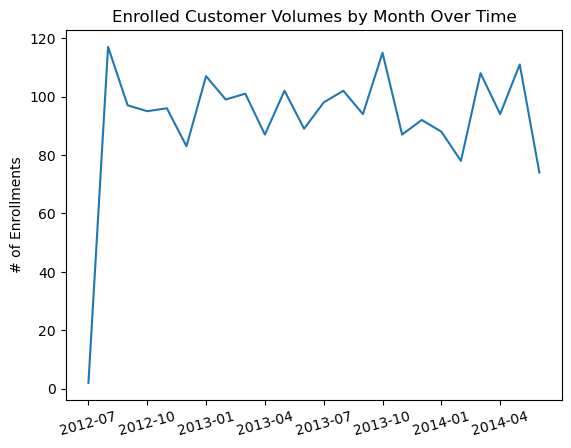

In [16]:
# create line plot for customers enrolled over time

plt.plot(purchase_counts_100['dt_customer'], purchase_counts_100['purchases'])
# plt.xlabel('Time')
plt.ylabel('# of Enrollments')
plt.title('Enrolled Customer Volumes by Month Over Time')
xticks=['2012-07','2012-10','2013-01','2013-04','2013-07','2013-10','2014-01','2014-04']
plt.xticks(xticks, rotation=15);

In [17]:
# create table for amount of purchases per quarter

purchases = pd.to_datetime(marketing_df_110.dt_customer).dt.quarter
purchase_counts = purchases.value_counts().reset_index().rename(columns={"index": "quarter",
                                                                         "dt_customer":"purchases"})

# df.col = pd.to_datetime(marketing_df_110.dt_customer).dt.to_period('m')
purchase_counts_100 = purchase_counts.sort_values(by='quarter', ascending=True)
purchase_counts_100.head()

,quarter,purchases
0,1,581
2,2,557
3,3,510
1,4,568


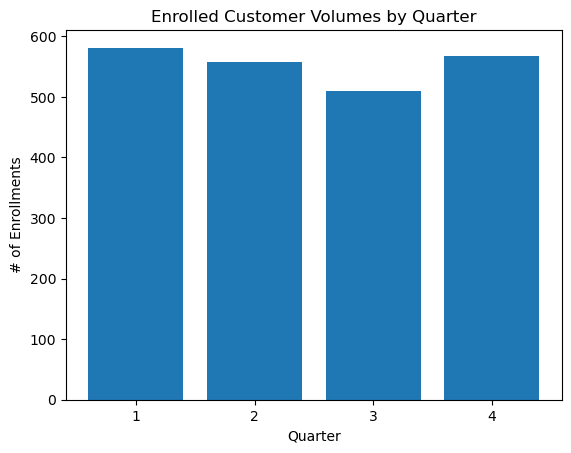

In [18]:
# create line plot for customers enrolled over time

plt.bar(purchase_counts_100['quarter'], purchase_counts_100['purchases'])
# plt.xlabel('Time')
plt.ylabel('# of Enrollments')
plt.xlabel('Quarter')
plt.title('Enrolled Customer Volumes by Quarter')
plt.xticks(np.arange(1,5,1));

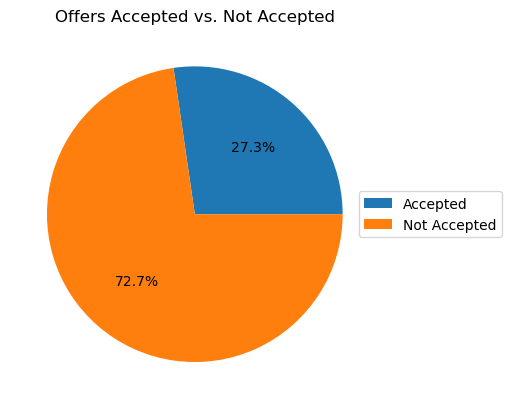

In [19]:
# create pie chart for final_response variable

accepted = len(marketing_df_110[marketing_df_110['final_response'] == 1])
not_accepted = len(marketing_df_110[marketing_df_110['final_response'] == 0])

plt.pie([accepted,not_accepted], autopct='%1.1f%%')
plt.title('Offers Accepted vs. Not Accepted')
plt.legend(['Accepted', 'Not Accepted'], loc='center right', bbox_to_anchor=(1.35, 0.5));

In [20]:
# create table of when customer enrolled by month

marketing_df_110['month'] = marketing_df_110['dt_customer'].dt.month

enrolled = marketing_df_110.month
enrolled_counts = enrolled.value_counts().reset_index().rename(columns={"index": "month",
                                                                         "month":"dt_customer"})
enrolled_counts_100 = enrolled_counts.sort_values(by='month', ascending=True)
enrolled_counts_100.head()

,month,dt_customer
4,1,195
8,2,177
3,3,209
7,4,181
1,5,213


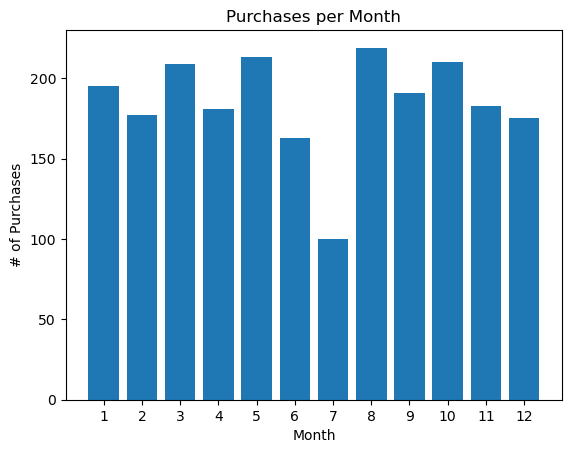

In [21]:
# create bar chart for purchases over time by quarter

plt.bar(enrolled_counts_100['month'], enrolled_counts_100['dt_customer'])
plt.xlabel('Month')
plt.ylabel('# of Purchases')
plt.title('Purchases per Month')
plt.xticks(np.arange(1,13,1));

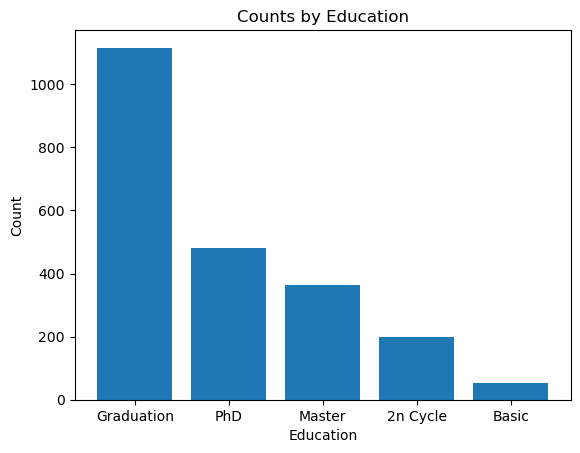

In [22]:
# create bar chart for education

education = marketing_df_110.education
education_counts = education.value_counts().reset_index().rename(columns={"index": "education",
                                                                         "education":"count"})
plt.bar(education_counts['education'], education_counts['count'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Counts by Education');

In [23]:
# define function to clean education variable

def education_function(row):
    if row['education'] == 'Graduation':
        return "Bachelor's"
    elif row['education'] == 'PhD':
        return 'PhD'
    elif row['education'] == 'Master':
        return "Master's"
    elif row['education'] == '2n Cycle':
        return "Master's"
    elif row['education'] == 'Basic':
        return 'Basic'
    else:
        return np.nan

In [24]:
marketing_df_110['education'] = marketing_df_110.apply(education_function, axis=1)

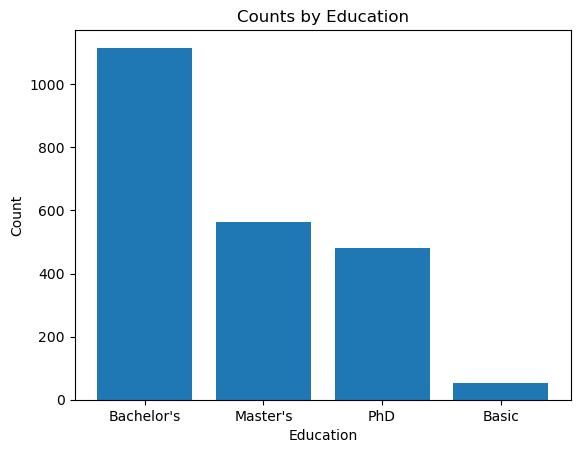

In [25]:
# create bar chart for education

education = marketing_df_110.education
education_counts = education.value_counts().reset_index().rename(columns={"index": "education",
                                                                         "education":"count"})
plt.bar(education_counts['education'], education_counts['count'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Counts by Education');

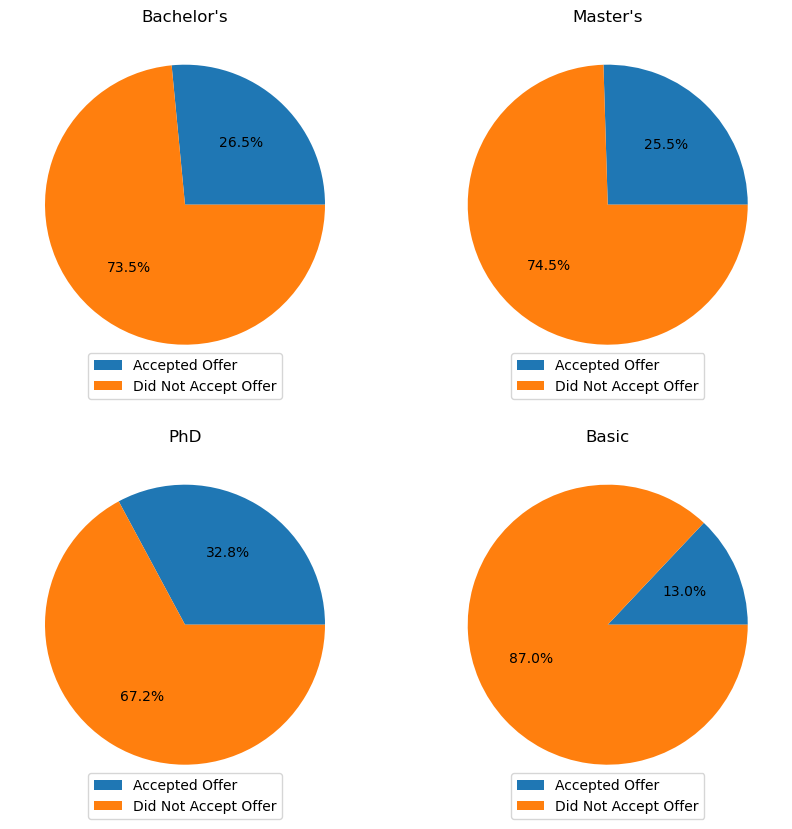

In [26]:
# create pie charts of accepted campaign offer for each education level

bachelors_accepted = len(marketing_df_110[(marketing_df_110['education'] == "Bachelor's") & 
                                           (marketing_df_110['final_response'] == 1)])
bachelors_not_accepted = len(marketing_df_110[(marketing_df_110['education'] == "Bachelor's") & 
                                           (marketing_df_110['final_response'] == 0)])

masters_accepted = len(marketing_df_110[(marketing_df_110['education'] == "Master's") & 
                                           (marketing_df_110['final_response'] == 1)])
masters_not_accepted = len(marketing_df_110[(marketing_df_110['education'] == "Master's") & 
                                           (marketing_df_110['final_response'] == 0)])

phd_accepted = len(marketing_df_110[(marketing_df_110['education'] == 'PhD') & 
                                           (marketing_df_110['final_response'] == 1)])
phd_not_accepted = len(marketing_df_110[(marketing_df_110['education'] == 'PhD') & 
                                           (marketing_df_110['final_response'] == 0)])

basic_accepted = len(marketing_df_110[(marketing_df_110['education'] == 'Basic') & 
                                           (marketing_df_110['final_response'] == 1)])
basic_not_accepted = len(marketing_df_110[(marketing_df_110['education'] == 'Basic') & 
                                           (marketing_df_110['final_response'] == 0)])


fig, axs = plt.subplots(2,2,figsize=(10,10))


axs[0,0].pie([bachelors_accepted, bachelors_not_accepted], autopct='%1.1f%%')
axs[0,0].set_title("Bachelor's")
axs[0,0].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075))

axs[0,1].pie([masters_accepted, masters_not_accepted], autopct='%1.1f%%')
axs[0,1].set_title("Master's")
axs[0,1].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075))

axs[1,0].pie([phd_accepted, phd_not_accepted], autopct='%1.1f%%')
axs[1,0].set_title('PhD')
axs[1,0].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075))

axs[1,1].pie([basic_accepted, basic_not_accepted], autopct='%1.1f%%')
axs[1,1].set_title('Basic')
axs[1,1].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075));

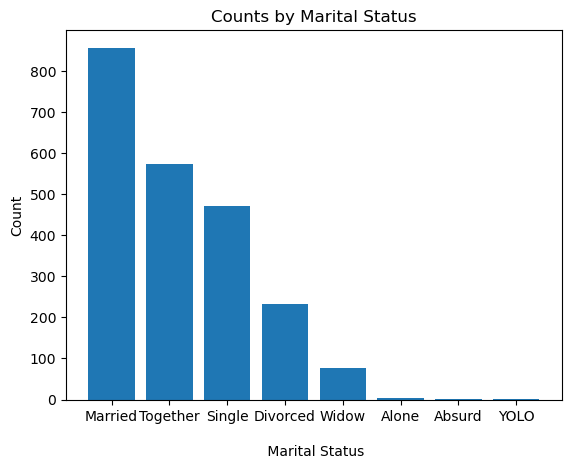

In [27]:
# create bar chart for marital status

marital_status = marketing_df_110.marital_status
marital_status_counts = marital_status.value_counts().reset_index().rename(columns={"index": "marital_status",
                                                                         "marital_status":"count"})
plt.bar(marital_status_counts['marital_status'], marital_status_counts['count'])
plt.xlabel('\n Marital Status')
plt.ylabel('Count')
plt.title('Counts by Marital Status');

In [28]:
# define function to clean marital_status variable

def marital_status_function(row):
    if row['marital_status'] == 'Married':
        return 'In Relationship'
    elif row['marital_status'] == 'Together':
        return 'In Relationship'
    elif row['marital_status'] == 'Single':
        return 'Single'
    elif row['marital_status'] == 'Divorced':
        return 'Single'
    elif row['marital_status'] == 'Widow':
        return 'Single'
    elif row['marital_status'] == 'Alone':
        return 'Single'
    elif row['marital_status'] == 'Absurd':
        return 'Single'
    elif row['marital_status'] == 'YOLO':
        return 'Single'
    else:
        return np.nan

In [29]:
# transform marital_status variable

marketing_df_110['marital_status'] = marketing_df_110.apply(marital_status_function, axis=1)

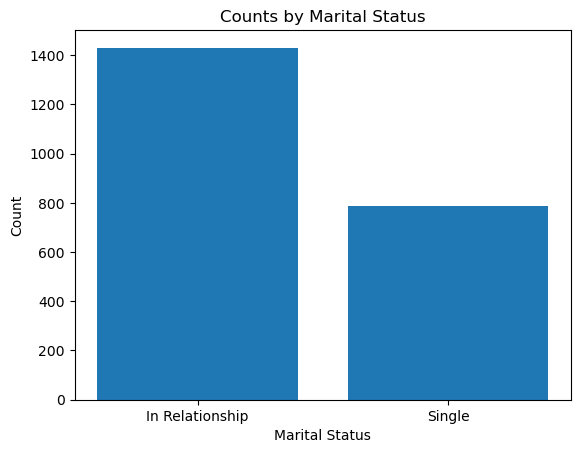

In [30]:
# create new bar chart for education

marital_status = marketing_df_110.marital_status
marital_status_counts = marital_status.value_counts().reset_index().rename(columns={"index": "marital_status",
                                                                         "marital_status":"count"})
plt.bar(marital_status_counts['marital_status'], marital_status_counts['count'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Counts by Marital Status');

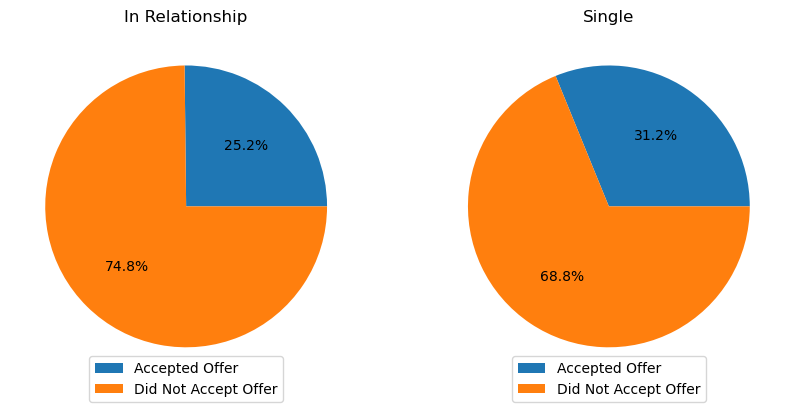

In [31]:
# create pie charts of accepted campaign offer for each marital_status

relationship_accepted = len(marketing_df_110[(marketing_df_110['marital_status'] == 'In Relationship') & 
                                           (marketing_df_110['final_response'] == 1)])
relationship_not_accepted = len(marketing_df_110[(marketing_df_110['marital_status'] == 'In Relationship') & 
                                           (marketing_df_110['final_response'] == 0)])

single_accepted = len(marketing_df_110[(marketing_df_110['marital_status'] == 'Single') & 
                                           (marketing_df_110['final_response'] == 1)])
single_not_accepted = len(marketing_df_110[(marketing_df_110['marital_status'] == 'Single') & 
                                           (marketing_df_110['final_response'] == 0)])

fig, axs = plt.subplots(1,2,figsize=(10,10))


axs[0].pie([relationship_accepted, relationship_not_accepted], autopct='%1.1f%%')
axs[0].set_title('In Relationship')
axs[0].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075))

axs[1].pie([single_accepted, single_not_accepted], autopct='%1.1f%%')
axs[1].set_title('Single')
axs[1].legend(['Accepted Offer', 'Did Not Accept Offer'], loc='lower center', bbox_to_anchor=(0.5, -0.075));

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\2105643316.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(marketing_df_110.corr(), annot = True, vmin = -1, vmax = 1)


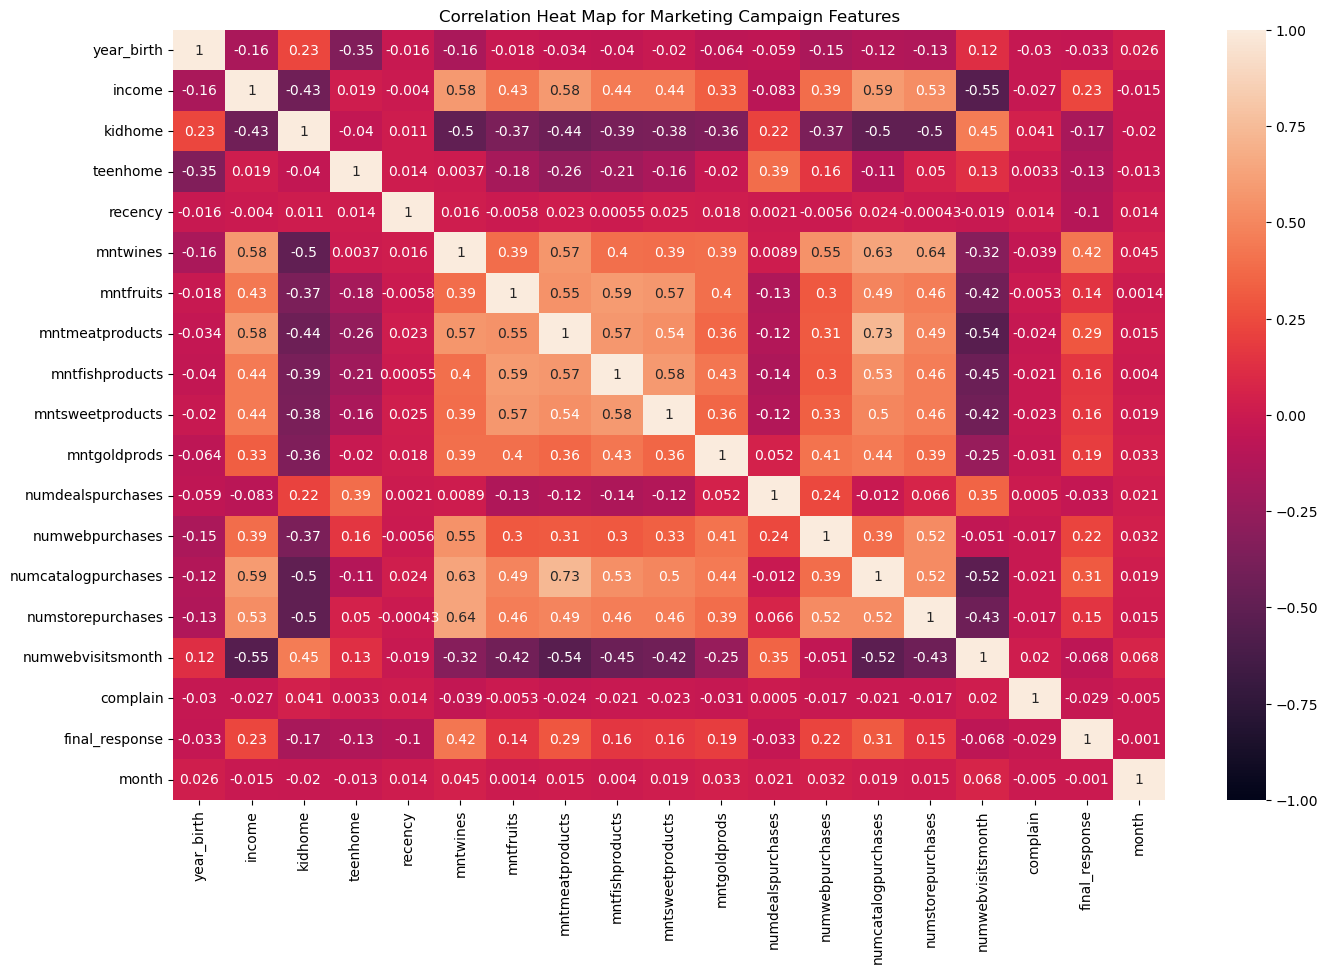

In [32]:
# create correlation matrix

plt.figure(figsize=(16, 10))
sb.heatmap(marketing_df_110.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('Correlation Heat Map for Marketing Campaign Features')
plt.show();

In [33]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations \n")
print(get_top_abs_correlations(marketing_df_110.drop(columns=['dt_customer', 'education', 'marital_status']), 4))

Top Absolute Correlations 

mntmeatproducts  numcatalogpurchases    0.734127
mntwines         numstorepurchases      0.640012
                 numcatalogpurchases    0.634753
mntfruits        mntfishproducts        0.593431
dtype: float64


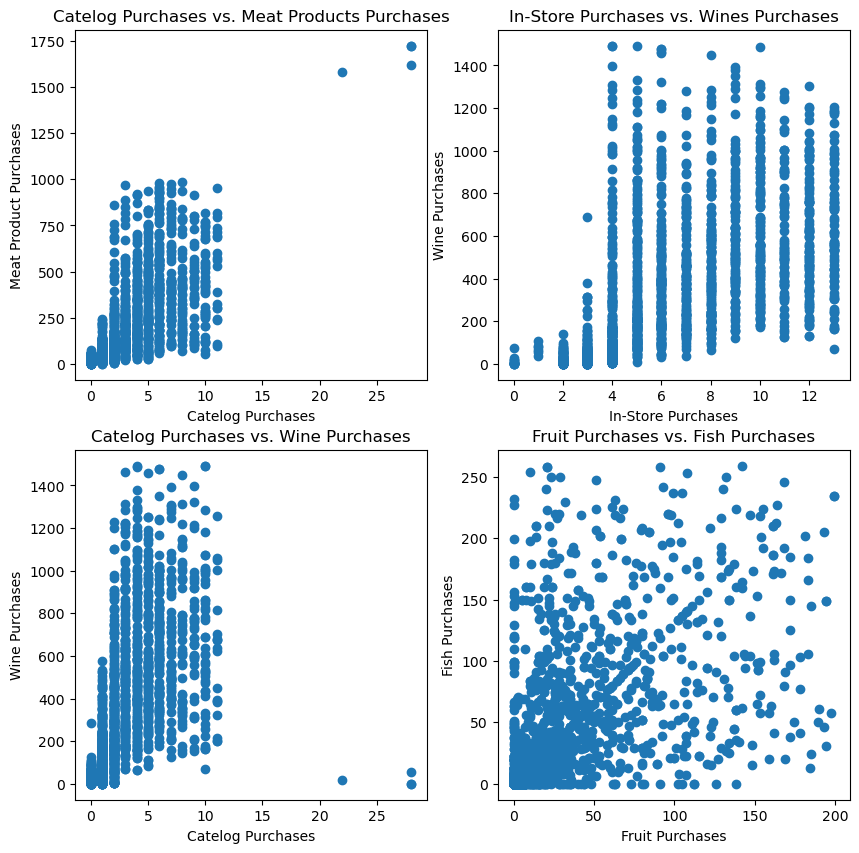

In [34]:
# create scatter plots of 4 most correlated features

fig, axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].scatter(x=marketing_df_110['numcatalogpurchases'], y=marketing_df_110['mntmeatproducts'])
axs[0,0].set_title('Catelog Purchases vs. Meat Products Purchases')
axs[0,0].set_xlabel('Catelog Purchases')
axs[0,0].set_ylabel('Meat Product Purchases')

axs[0,1].scatter(x=marketing_df_110['numstorepurchases'], y=marketing_df_110['mntwines'])
axs[0,1].set_title('In-Store Purchases vs. Wines Purchases')
axs[0,1].set_xlabel('In-Store Purchases')
axs[0,1].set_ylabel('Wine Purchases')

axs[1,0].scatter(x=marketing_df_110['numcatalogpurchases'], y=marketing_df_110['mntwines'])
axs[1,0].set_title('Catelog Purchases vs. Wine Purchases')
axs[1,0].set_xlabel('Catelog Purchases')
axs[1,0].set_ylabel('Wine Purchases')

axs[1,1].scatter(x=marketing_df_110['mntfruits'], y=marketing_df_110['mntfishproducts'])
axs[1,1].set_title('Fruit Purchases vs. Fish Purchases')
axs[1,1].set_xlabel('Fruit Purchases')
axs[1,1].set_ylabel('Fish Purchases');

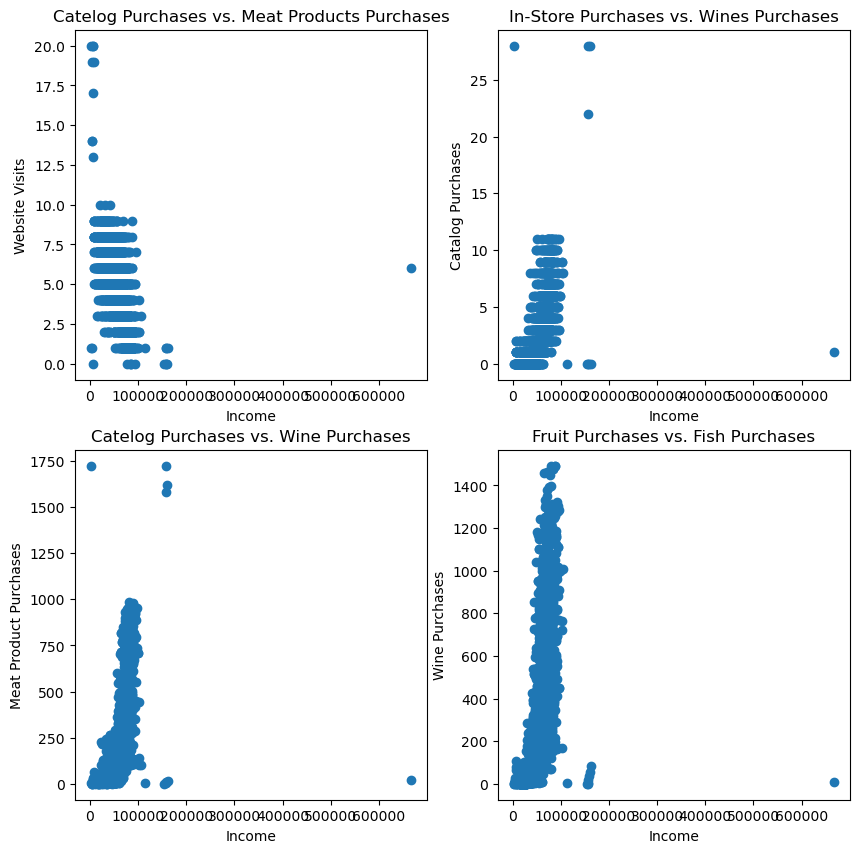

In [35]:
# create scatter plots of 4 most correlated features with income

fig, axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].scatter(x=marketing_df_110['income'], y=marketing_df_110['numwebvisitsmonth'])
axs[0,0].set_title('Catelog Purchases vs. Meat Products Purchases')
axs[0,0].set_xlabel('Income')
axs[0,0].set_ylabel('Website Visits')

axs[0,1].scatter(x=marketing_df_110['income'], y=marketing_df_110['numcatalogpurchases'])
axs[0,1].set_title('In-Store Purchases vs. Wines Purchases')
axs[0,1].set_xlabel('Income')
axs[0,1].set_ylabel('Catalog Purchases')

axs[1,0].scatter(x=marketing_df_110['income'], y=marketing_df_110['mntmeatproducts'])
axs[1,0].set_title('Catelog Purchases vs. Wine Purchases')
axs[1,0].set_xlabel('Income')
axs[1,0].set_ylabel('Meat Product Purchases')

axs[1,1].scatter(x=marketing_df_110['income'], y=marketing_df_110['mntwines'])
axs[1,1].set_title('Fruit Purchases vs. Fish Purchases')
axs[1,1].set_xlabel('Income')
axs[1,1].set_ylabel('Wine Purchases');

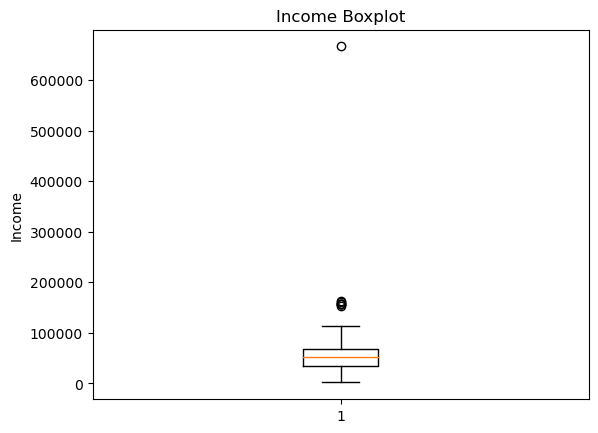

In [36]:
# view wine boxplot

plt.boxplot(x=marketing_df_110['income'])
plt.ylabel('Income')
plt.title('Income Boxplot');

In [37]:
# remove outliers from income feature

Q1 = marketing_df_110['income'].quantile(0.25)
Q3 = marketing_df_110['income'].quantile(0.75)
IQR = Q3 - Q1

filter = (marketing_df_110['income'] >= Q1 - 1.5 * IQR) & (marketing_df_110['income'] <= Q3 + 1.5 * IQR)
marketing_df_200 = marketing_df_110.loc[filter]

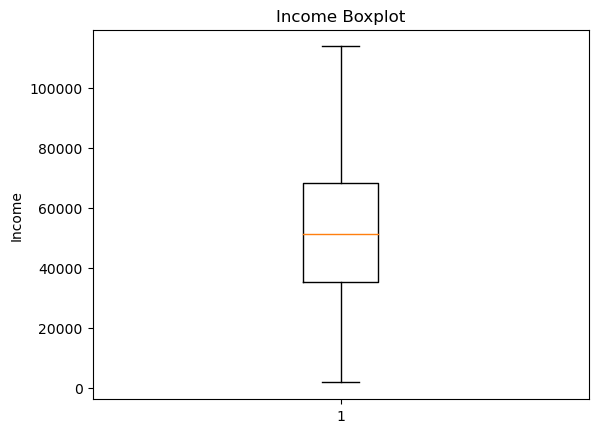

In [38]:
# view new wine boxplot

plt.boxplot(x=marketing_df_200['income'])
plt.ylabel('Income')
plt.title('Income Boxplot');

In [39]:
marketing_df_200.shape

(2208, 22)

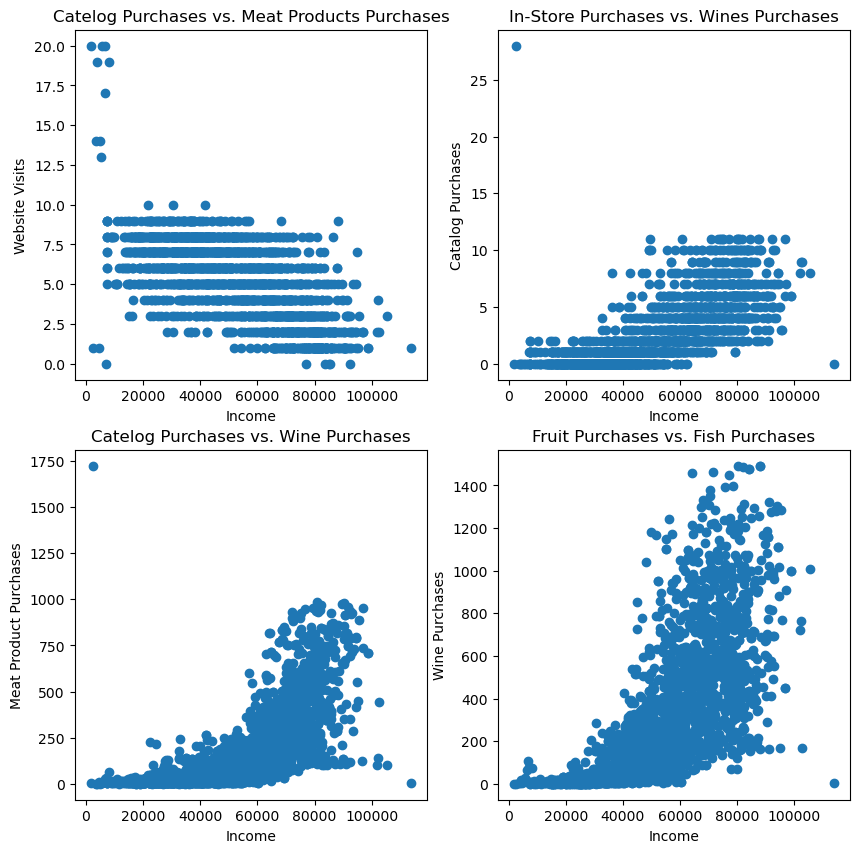

In [40]:
# create scatter plots of 4 most correlated features with income after removing outliers

fig, axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].scatter(x=marketing_df_200['income'], y=marketing_df_200['numwebvisitsmonth'])
axs[0,0].set_title('Catelog Purchases vs. Meat Products Purchases')
axs[0,0].set_xlabel('Income')
axs[0,0].set_ylabel('Website Visits')

axs[0,1].scatter(x=marketing_df_200['income'], y=marketing_df_200['numcatalogpurchases'])
axs[0,1].set_title('In-Store Purchases vs. Wines Purchases')
axs[0,1].set_xlabel('Income')
axs[0,1].set_ylabel('Catalog Purchases')

axs[1,0].scatter(x=marketing_df_200['income'], y=marketing_df_200['mntmeatproducts'])
axs[1,0].set_title('Catelog Purchases vs. Wine Purchases')
axs[1,0].set_xlabel('Income')
axs[1,0].set_ylabel('Meat Product Purchases')

axs[1,1].scatter(x=marketing_df_200['income'], y=marketing_df_200['mntwines'])
axs[1,1].set_title('Fruit Purchases vs. Fish Purchases')
axs[1,1].set_xlabel('Income')
axs[1,1].set_ylabel('Wine Purchases');

In [41]:
# view sales by product

non_products = ['year_birth', 'education', 'marital_status', 'teenhome', 'recency', 'numdealspurchases',
                'numwebpurchases', 'numcatalogpurchases', 'numcatalogpurchases','numstorepurchases',
                'numwebvisitsmonth', 'complain', 'final_response', 'month', 'income', 'kidhome']

pd.DataFrame(marketing_df_200.drop(columns=non_products,
                                   axis=1).sum().sort_values(ascending=False)).reset_index().rename(columns={"index":"product"})

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\2960900796.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(marketing_df_200.drop(columns=non_products,


,product,0
0,mntwines,675871
1,mntmeatproducts,365088
2,mntgoldprods,97397
3,mntfishproducts,83371
4,mntsweetproducts,59886
5,mntfruits,58369


In [42]:
# view sales by education
non_products = ['year_birth', 'marital_status', 'teenhome', 'recency', 'numdealspurchases',
                'numwebpurchases', 'numcatalogpurchases', 'numcatalogpurchases','numstorepurchases',
                'numwebvisitsmonth', 'complain', 'final_response', 'month', 'income', 'kidhome']

pd.DataFrame(marketing_df_200.drop(columns=non_products,axis=1)).groupby('education').sum()

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\1404057052.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(marketing_df_200.drop(columns=non_products,axis=1)).groupby('education').sum()


,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
education,,,,,,
Bachelor's,318100,34426,199575,48442,34912,56549
Basic,391,600,618,921,654,1233
Master's,161668,13673,86473,21101,14540,24037
PhD,195712,9670,78422,12907,9780,15578


In [43]:
# view sales by marital_status
non_products = ['year_birth', 'education', 'teenhome', 'recency', 'numdealspurchases',
                'numwebpurchases', 'numcatalogpurchases', 'numcatalogpurchases','numstorepurchases',
                'numwebvisitsmonth', 'complain', 'final_response', 'month', 'income', 'kidhome']

pd.DataFrame(marketing_df_200.drop(columns=non_products,axis=1)).groupby('marital_status').sum()

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\500190042.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(marketing_df_200.drop(columns=non_products,axis=1)).groupby('marital_status').sum()


,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
marital_status,,,,,,
In Relationship,433480,36558,228288,52745,37948,61444
Single,242391,21811,136800,30626,21938,35953


In [44]:
# view total purchases by purchase method

non_purchase_methods = ['year_birth', 'education', 'marital_status', 'teenhome', 'recency', 'mntwines',
                'mntfruits', 'mntmeatproducts', 'mntfishproducts','mntsweetproducts', 'mntgoldprods',
                'numwebvisitsmonth', 'complain', 'final_response', 'month', 'income', 'kidhome']

pd.DataFrame(marketing_df_200.drop(columns=non_purchase_methods,
                                   axis=1).sum().sort_values(ascending=False)).reset_index().rename(columns={"index":"method"})

C:\Users\trevo\AppData\Local\Temp\ipykernel_33136\99607171.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(marketing_df_200.drop(columns=non_purchase_methods,


,method,0
0,numstorepurchases,12849
1,numwebpurchases,9049
2,numcatalogpurchases,5840
3,numdealspurchases,5115


# Preprocessing Continued


In [45]:
# create dummy variables for remaining categorical features

categoricals = ['marital_status', 'education']

marketing_df_300 = pd.get_dummies(marketing_df_200, columns=categoricals, drop_first=True)

In [46]:
# drop dt_customer column, use new month feature for data on when customer subscribed

marketing_df_400 = marketing_df_300.drop(columns=['dt_customer'], axis=1)

marketing_df_400.head()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,final_response,month,marital_status_Single,education_Basic,education_Master's,education_PhD
0,1957,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,1,9,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,3,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,8,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,2,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,1,0,0,0,1


# Apply Min Max Scaler

In [47]:
# apply min-max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(marketing_df_400)

marketing_df_scaled = scaler.transform(marketing_df_400)

In [48]:
# turn scaled values back to dataframe

marketing_df_scaled_100 = pd.DataFrame(marketing_df_scaled, columns=marketing_df_400.columns)

marketing_df_scaled_100.head()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,final_response,month,marital_status_Single,education_Basic,education_Master's,education_PhD
0,0.621359,0.503625,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,...,0.357143,0.307692,0.35,0.0,1.0,0.727273,1.0,0.0,0.0,0.0
1,0.592233,0.398325,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,...,0.035714,0.153846,0.25,0.0,0.0,0.181818,1.0,0.0,0.0,0.0
2,0.699029,0.623933,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,...,0.071429,0.769231,0.20,0.0,0.0,0.636364,0.0,0.0,0.0,0.0
3,0.883495,0.222456,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,...,0.000000,0.307692,0.30,0.0,0.0,0.090909,0.0,0.0,0.0,0.0
4,0.854369,0.505009,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,...,0.107143,0.461538,0.25,0.0,0.0,0.000000,0.0,0.0,0.0,1.0


In [49]:
# observed scaled features

marketing_df_scaled_100.describe()

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,final_response,month,marital_status_Single,education_Basic,education_Master's,education_PhD
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.735991,0.445552,0.221014,0.253170,0.495091,0.205024,0.132840,0.095854,0.145786,0.103520,...,0.094462,0.447638,0.266712,0.009511,0.274004,0.497200,0.355525,0.024457,0.255435,0.216033
std,0.116426,0.184934,0.268531,0.272162,0.292309,0.226066,0.200213,0.126291,0.211634,0.156935,...,0.099944,0.249374,0.120692,0.097081,0.446112,0.317570,0.478781,0.154497,0.436204,0.411630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.640777,0.298793,0.000000,0.000000,0.242424,0.016075,0.010050,0.009275,0.011583,0.003817,...,0.000000,0.230769,0.150000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000
50%,0.747573,0.442582,0.000000,0.000000,0.494949,0.118888,0.040201,0.039420,0.046332,0.030534,...,0.071429,0.384615,0.300000,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000
75%,0.815534,0.594262,0.500000,0.500000,0.747475,0.339585,0.165829,0.134493,0.193050,0.129771,...,0.142857,0.615385,0.350000,0.000000,1.000000,0.818182,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Random Forest Classifier Model


In [50]:
# split into training and test sets

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indicies in split.split(marketing_df_scaled_100, marketing_df_scaled_100["final_response"]):
    strat_train_set = marketing_df_scaled_100.loc[train_indices]
    strat_test_set = marketing_df_scaled_100.loc[test_indicies]
    
X = strat_train_set.drop(['final_response'], axis=1)
y = strat_train_set['final_response']

In [51]:
# create Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [52]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [53]:
X_test = strat_test_set.drop(['final_response'], axis=1)
y_test = strat_test_set['final_response']

final_clf.score(X_test, y_test)

0.8393665158371041

In [54]:
# print confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = final_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

[[302  19]
 [ 52  69]]
True Positives: 302
False Positives: 19
True Negatives: 69
False Negatives: 52


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

precision = precision_score(y_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 83.94%
Precision: 78.41%
Recall: 57.02%
F1 Score: 66.03%


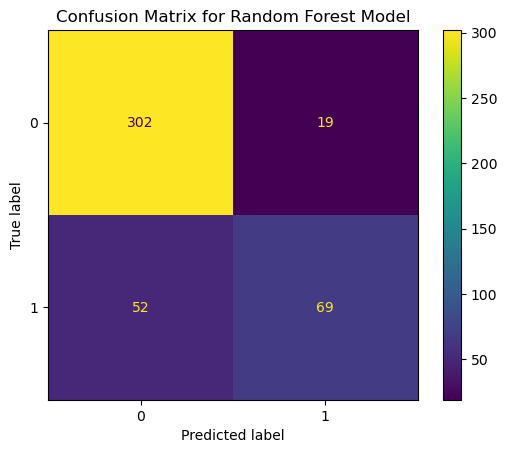

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(colorbar='viridis')
plt.title('Confusion Matrix for Random Forest Model');

# Logistic Regression

In [57]:
# split into training and test sets

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indicies in split.split(marketing_df_scaled_100, marketing_df_scaled_100["final_response"]):
    strat_train_set = marketing_df_scaled_100.loc[train_indices]
    strat_test_set = marketing_df_scaled_100.loc[test_indicies]
    
X = strat_train_set.drop(['final_response'], axis=1)
y = strat_train_set['final_response']

In [58]:
# create logistic model and fit training

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X, y)

LogisticRegression()

In [59]:
# predict test data

X_test = strat_test_set.drop(['final_response'], axis=1)
y_test = strat_test_set['final_response']

y_pred = log_reg.predict(X_test)

log_reg.score(X_test, y_test)

0.7963800904977375

In [60]:
# print confusion matrix

y_pred = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

[[297  24]
 [ 66  55]]
True Positives: 297
False Positives: 24
True Negatives: 55
False Negatives: 66


In [61]:
# print scores

precision = precision_score(y_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 79.64%
Precision: 69.62%
Recall: 45.45%
F1 Score: 55.00%


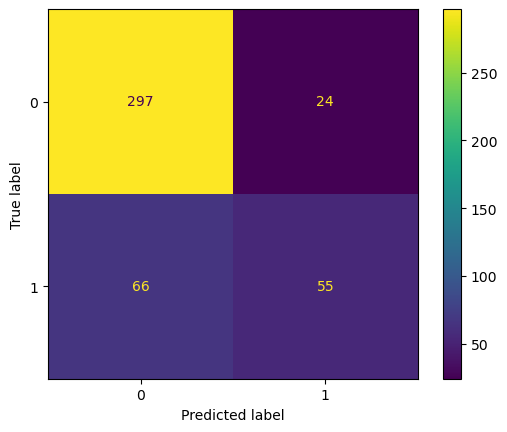

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(colorbar='viridis');

# K Nearest Neighbors

In [63]:
# split into training and test sets

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indicies in split.split(marketing_df_scaled_100, marketing_df_scaled_100["final_response"]):
    strat_train_set = marketing_df_scaled_100.loc[train_indices]
    strat_test_set = marketing_df_scaled_100.loc[test_indicies]
    
X = strat_train_set.drop(['final_response'], axis=1)
y = strat_train_set['final_response']

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=11)

In [65]:
X_test = strat_test_set.drop(['final_response'], axis=1)
y_test = strat_test_set['final_response']

y_pred = knn.predict(X_test.values)

print(confusion_matrix(y_test, y_pred))

TP = confusion_matrix(y_test, y_pred)[0][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
FN = confusion_matrix(y_test, y_pred)[1][0]
TN = confusion_matrix(y_test, y_pred)[1][1]

print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'True Negatives: {TN}')
print(f'False Negatives: {FN}')

C:\Users\trevo\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[306  15]
 [ 81  40]]
True Positives: 306
False Positives: 15
True Negatives: 40
False Negatives: 81


In [66]:
# print scores

precision = precision_score(y_test, y_pred)

# obtain recall from sklearn.metrics
recall = recall_score(y_test, y_pred)

# obtain F1-score from sklearn.metrics
f1 = f1_score(y_test, y_pred)

# obtain accuracy from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)

print(F'Accuracy: {(accuracy * 100):.2f}%')
print(f'Precision: {(precision * 100):.2f}%')
print(f'Recall: {(recall * 100):.2f}%')
print(f'F1 Score: {(f1 * 100):.2f}%')

Accuracy: 78.28%
Precision: 72.73%
Recall: 33.06%
F1 Score: 45.45%


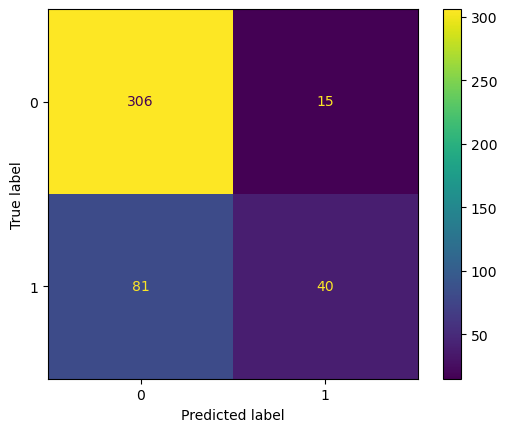

In [67]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(colorbar='viridis');